<a href="https://colab.research.google.com/github/muradek/ML_Major_HW2/blob/main/HW2_M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load Data

In [3]:
!rm *.csv

from google.colab import files
print("Please load the raw csv data")
uploadedData = files.upload()
filename = list(uploadedData)[0]

rm: cannot remove '*.csv': No such file or directory
Please load the raw csv data


Saving train_df_prepared.csv to train_df_prepared.csv


In [4]:
train = pd.read_csv(filename)

In [5]:
train.shape

(1000, 24)

In [6]:
!rm *.csv

from google.colab import files
print("Please load the raw csv data")
uploadedData = files.upload()
filename = list(uploadedData)[0]

Please load the raw csv data


Saving test_df_prepared.csv to test_df_prepared.csv


In [7]:
test = pd.read_csv(filename)

In [8]:
test.shape

(250, 24)

# **Part 1: Basic model selection with k-Nearest Neighbors**

In [9]:
def visualize_clf(clf, X, Y, title,
                  xlabel, ylabel,
                  marker_size=50,
                  grid_length=300,
                  linewidths=None):
    import matplotlib.pyplot as plt
    import pandas as pd
    from matplotlib.colors import ListedColormap

    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()

    # For internal use here, make sure labels are 0 and 1
    Y = np.ravel(Y).astype(int)
    labels = set(Y)
    assert len(labels) == 2, "Can only visualize two unique labels"

    if labels == set([-1,1]):
      Y = (Y + 1) // 2
      labels = set(Y)

    assert labels == set([0,1]), "Could not handle given labels"

    plt.figure(figsize=(8, 8))

    # Parameters
    n_classes = 2
    markers = ["D", "o"]
    palette = sns.color_palette("hls", 2)
    custom_cmap = ListedColormap(palette.as_hex())

    x_delta = np.abs(X[:, 0].max() - X[:, 0].min()) * 0.1
    y_delta = np.abs(X[:, 1].max() - X[:, 1].min()) * 0.1
    x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
    y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_length),
                         np.linspace(y_min, y_max, grid_length))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.35)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.75)

    # Plot the training points
    for i, color, marker in zip(labels, palette, markers):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=color,
                    marker=marker,
                    edgecolor='white', s=marker_size,
                    linewidths=linewidths)

    plt.title(title, fontsize=20)
    plt.axis("tight")
    plt.show()


In [10]:
train.head()

,age,sex,weight,current_location,num_of_siblings,happiness_score,household_income,conversations_per_day,sugar_levels,sport_activity,...,PCR_04,PCR_05,PCR_06,PCR_07,PCR_08,PCR_09,PCR_10,spread,risk,SpecialProperty
0,33,1,79.2,"('57.30185', '39.85331')",0,7,0.1,3,112,1,...,-0.854489,1.651685,-0.259948,1.587620,0.154653,0.699371,0.750890,-1.0,1,False
1,40,1,66.2,"('51.19139', '6.51352')",3,10,1.4,3,104,1,...,1.822390,0.897466,-1.032219,-0.614646,-0.757062,-0.145924,-0.468320,1.0,1,False
2,13,0,30.1,"('60.02427', '30.28491')",2,11,1.1,4,51,0,...,-0.110836,-0.634716,-0.825147,1.147335,-0.915574,0.965901,0.809377,-1.0,-1,True
3,10,1,34.9,"('-21.41222', '-42.19667')",2,8,1.2,9,52,1,...,-0.025483,-0.481008,-0.260672,0.582176,2.261562,0.984764,0.013915,-1.0,-1,False
4,11,0,34.0,"('16.75973', '-93.11308')",3,10,0.1,3,55,1,...,1.442207,0.410215,0.035451,1.047244,-0.609780,-0.050378,-0.609713,1.0,-1,False


## **Visualization and basic analysis**

In [11]:
tmp = train[['PCR_04', 'PCR_09', 'spread']]

**Q1**

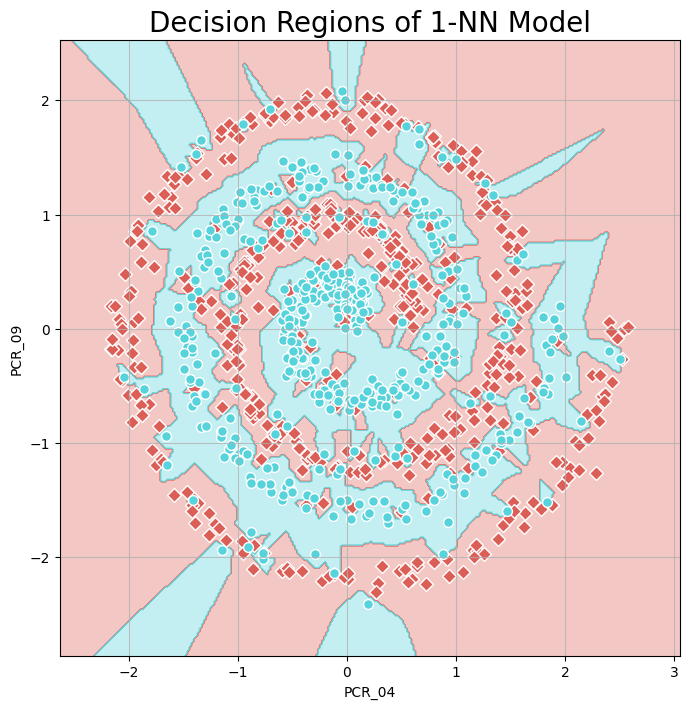

The trainig accuracy is 1.0


In [12]:
from sklearn.neighbors import KNeighborsClassifier
knncls = KNeighborsClassifier(n_neighbors=1)
X = tmp[['PCR_04', 'PCR_09']].values
Y= tmp['spread'].values
knncls.fit(X, Y)
visualize_clf(knncls, X, Y, 'Decision Regions of 1-NN Model','PCR_04', 'PCR_09')
print(f'The trainig accuracy is {knncls.score(X, Y)}')

In [13]:
tmp_test = test[['PCR_04', 'PCR_09', 'spread']]
X_test = tmp_test[['PCR_04', 'PCR_09']].values
Y_test= tmp_test['spread'].values
print(f'The test accuracy is {knncls.score(X_test, Y_test)}')

The test accuracy is 0.688


## **Model Selection**

**Q2**

In [14]:
from sklearn.model_selection import cross_validate

train_scores = []
test_scores =[]
optional_num_of_neighbors =list(range(1, 20, 2)) + list(range(20, 695, 65))
# iter = 0
for i in optional_num_of_neighbors:
  # print(f'iteration #: {iter}, # of neighbor tested: {i}')
  # iter+=1
  curr_clf = KNeighborsClassifier(n_neighbors=i)
  res_scores = cross_validate(curr_clf, X, Y, cv=8, return_train_score=True)
  train_scores.append(np.mean(res_scores['train_score']))
  test_scores.append(np.mean(res_scores['test_score']))


print('-------- TRAIN SCORES --------')
print(train_scores)
print('-------- TEST SCORES --------')
print(test_scores)

-------- TRAIN SCORES --------
[1.0, 0.8742857142857143, 0.8544285714285714, 0.8552857142857143, 0.8518571428571429, 0.8515714285714286, 0.8501428571428571, 0.8474285714285714, 0.8474285714285714, 0.846, 0.8427142857142857, 0.5834285714285714, 0.5392857142857144, 0.5882857142857143, 0.6017142857142856, 0.5404285714285715, 0.5142857142857143, 0.4911428571428571, 0.48842857142857143, 0.488, 0.48971428571428566]
-------- TEST SCORES --------
[0.743, 0.8, 0.8330000000000001, 0.843, 0.8500000000000001, 0.851, 0.8440000000000001, 0.8440000000000001, 0.8420000000000001, 0.831, 0.829, 0.5680000000000001, 0.532, 0.5740000000000001, 0.5960000000000001, 0.532, 0.511, 0.487, 0.49, 0.488, 0.485]


In [15]:
train_list  = list(train_scores)
test_list  = list(test_scores)
d ={'num of neigbhors': optional_num_of_neighbors, 'train score': train_list, 'test score': test_list}
cv_stats = pd.DataFrame(data=d)
cv_stats

,num of neigbhors,train score,test score
0,1,1.000000,0.743
1,3,0.874286,0.800
2,5,0.854429,0.833
3,7,0.855286,0.843
4,9,0.851857,0.850
5,11,0.851571,0.851
6,13,0.850143,0.844
7,15,0.847429,0.844
8,17,0.847429,0.842
9,19,0.846000,0.831


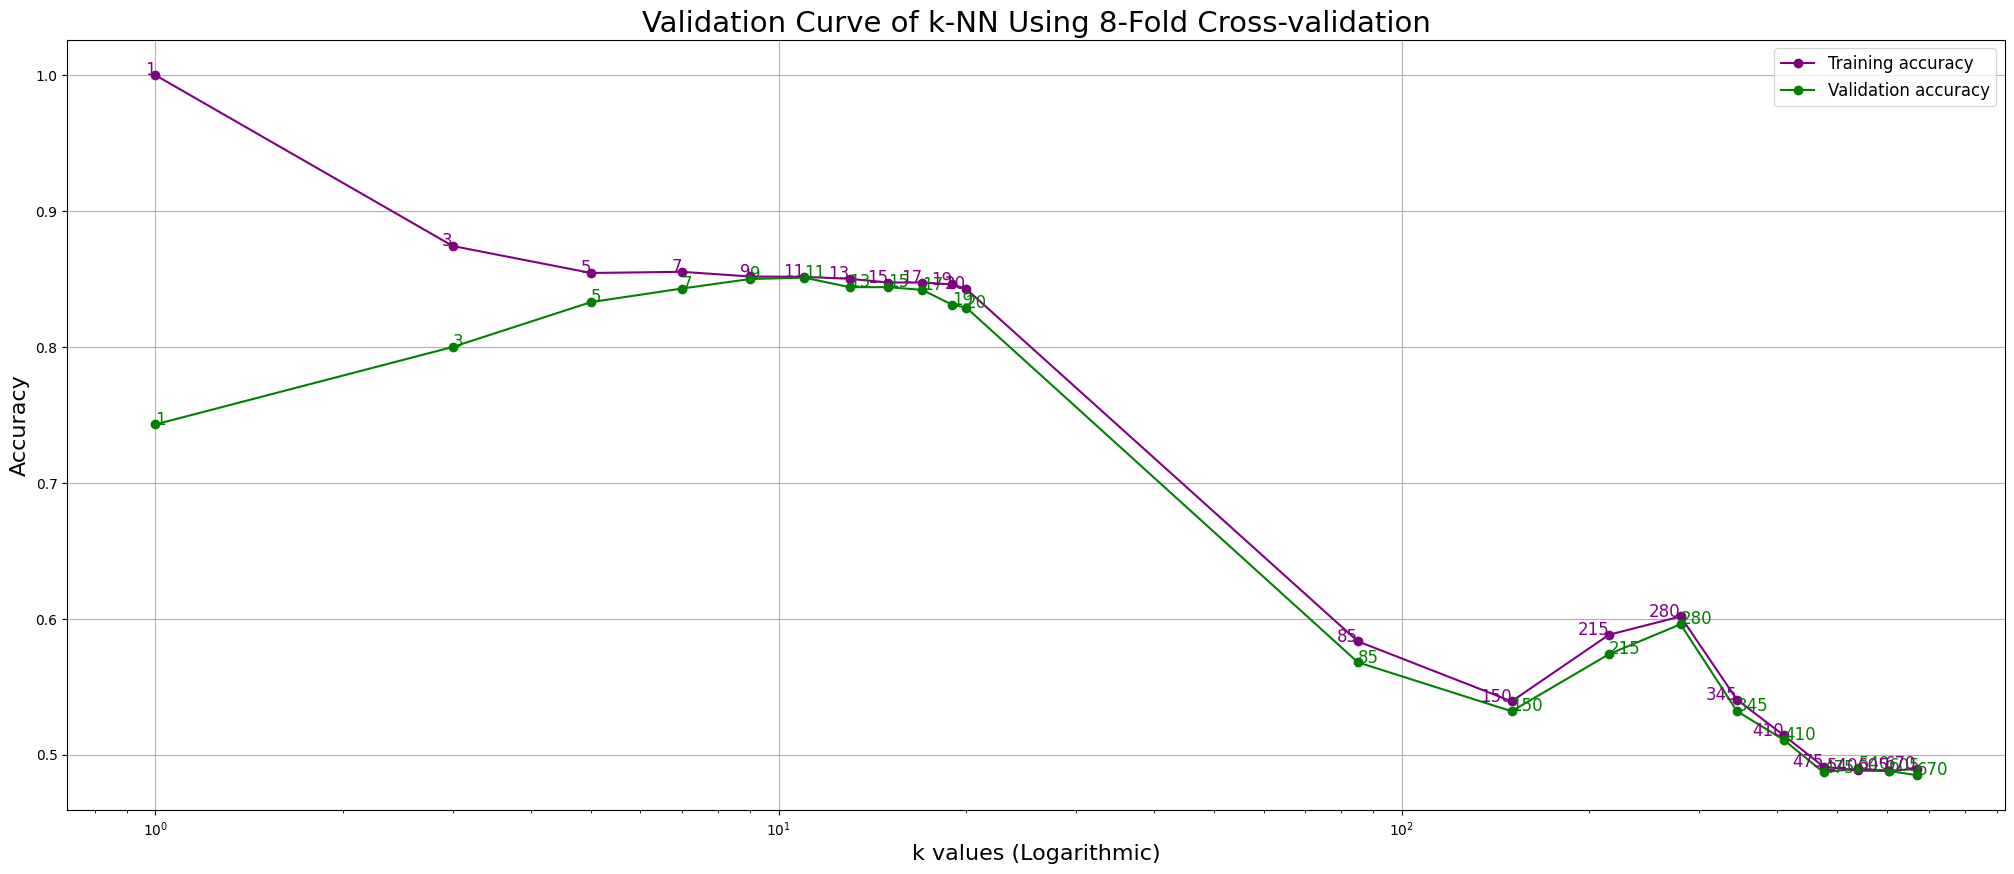

In [16]:
fig = plt.figure(figsize=(25, 10))
plt.grid(True)

plt.semilogx(cv_stats['num of neigbhors'], cv_stats['train score'], '.-',label = 'Training accuracy', color = 'purple', markersize=12)
plt.semilogx(cv_stats['num of neigbhors'], cv_stats['test score'], '.-', label = 'Validation accuracy', color = 'green', markersize=12)

for i, num in enumerate(optional_num_of_neighbors):
    plt.text(num, cv_stats['train score'][i], str(num), color='purple', fontsize=12, ha='right')
    plt.text(num, cv_stats['test score'][i], str(num), color='green', fontsize=12, ha='left')

plt.title('Validation Curve of k-NN Using 8-Fold Cross-validation', fontsize=21)
plt.xlabel('k values (Logarithmic)', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)

# Adding legend
plt.legend(fontsize=12)

# Displaying the plot
plt.show()

**Q3**

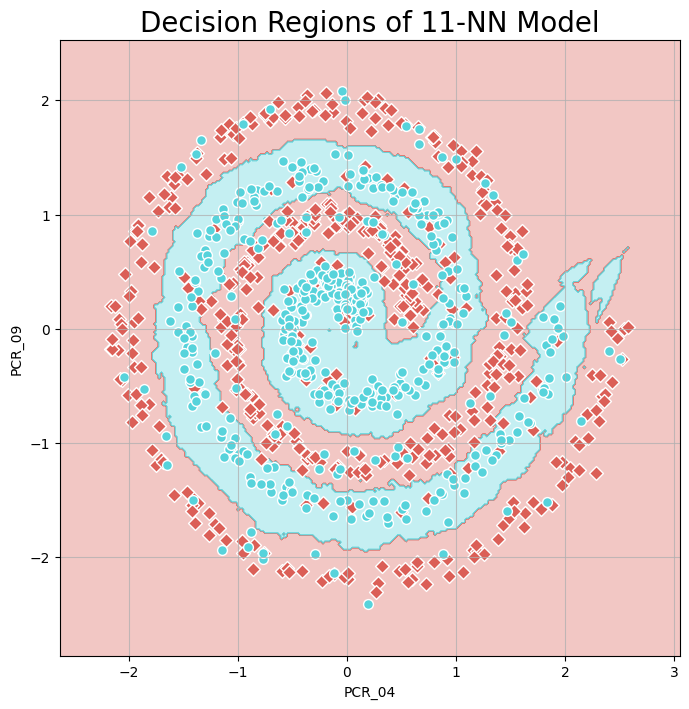

The trainig accuracy is 0.853
The test accuracy is 0.792


In [17]:
optknnclf =  KNeighborsClassifier(n_neighbors=11)
optknnclf.fit(X, Y)
visualize_clf(optknnclf, X, Y, 'Decision Regions of 11-NN Model','PCR_04', 'PCR_09')
print(f'The trainig accuracy is {optknnclf.score(X, Y)}')
print(f'The test accuracy is {optknnclf.score(X_test, Y_test)}')

# **Part 2: Decision Trees**

In [18]:
train_data2 = train.copy()
train_data2.drop(columns='current_location', inplace=True)
train_data2['SpecialProperty'] = train_data2['SpecialProperty'].replace({True: 1, False: -1})
train_data2

,age,sex,weight,num_of_siblings,happiness_score,household_income,conversations_per_day,sugar_levels,sport_activity,pcr_date,...,PCR_04,PCR_05,PCR_06,PCR_07,PCR_08,PCR_09,PCR_10,spread,risk,SpecialProperty
0,33,1,79.2,0,7,0.1,3,112,1,2021-03-11,...,-0.854489,1.651685,-0.259948,1.587620,0.154653,0.699371,0.750890,-1.0,1,-1
1,40,1,66.2,3,10,1.4,3,104,1,2021-11-16,...,1.822390,0.897466,-1.032219,-0.614646,-0.757062,-0.145924,-0.468320,1.0,1,-1
2,13,0,30.1,2,11,1.1,4,51,0,2021-09-18,...,-0.110836,-0.634716,-0.825147,1.147335,-0.915574,0.965901,0.809377,-1.0,-1,1
3,10,1,34.9,2,8,1.2,9,52,1,2022-09-27,...,-0.025483,-0.481008,-0.260672,0.582176,2.261562,0.984764,0.013915,-1.0,-1,-1
4,11,0,34.0,3,10,0.1,3,55,1,2021-01-22,...,1.442207,0.410215,0.035451,1.047244,-0.609780,-0.050378,-0.609713,1.0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,24,0,80.5,2,8,98.3,4,111,1,2022-06-01,...,-1.581688,0.185011,-0.927699,-1.559881,0.901163,1.057342,0.553708,-1.0,-1,1
996,72,0,56.7,2,9,1.2,8,84,1,2021-12-21,...,-0.128872,-0.516646,-0.037406,-0.100518,3.686450,0.482656,0.457981,1.0,1,-1
997,21,1,43.7,5,9,1.4,2,107,2,2022-04-10,...,-1.067601,0.186972,1.526441,-1.025561,-0.973563,-0.054049,0.467774,-1.0,1,1
998,14,0,47.3,2,9,98.5,2,100,1,2021-02-07,...,-0.713513,-0.677277,-0.563600,0.107796,-0.944673,1.250115,0.160353,1.0,1,1


In [19]:
tmp2 = train_data2[['PCR_03', 'PCR_10', 'SpecialProperty', 'risk']]
Y2 = tmp2['risk'].values
tmp2.drop(columns='risk', inplace=True)
X2=tmp2.values

<ipython-input-19-400169170de3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp2.drop(columns='risk', inplace=True)


## **Visualization**



**Q5**

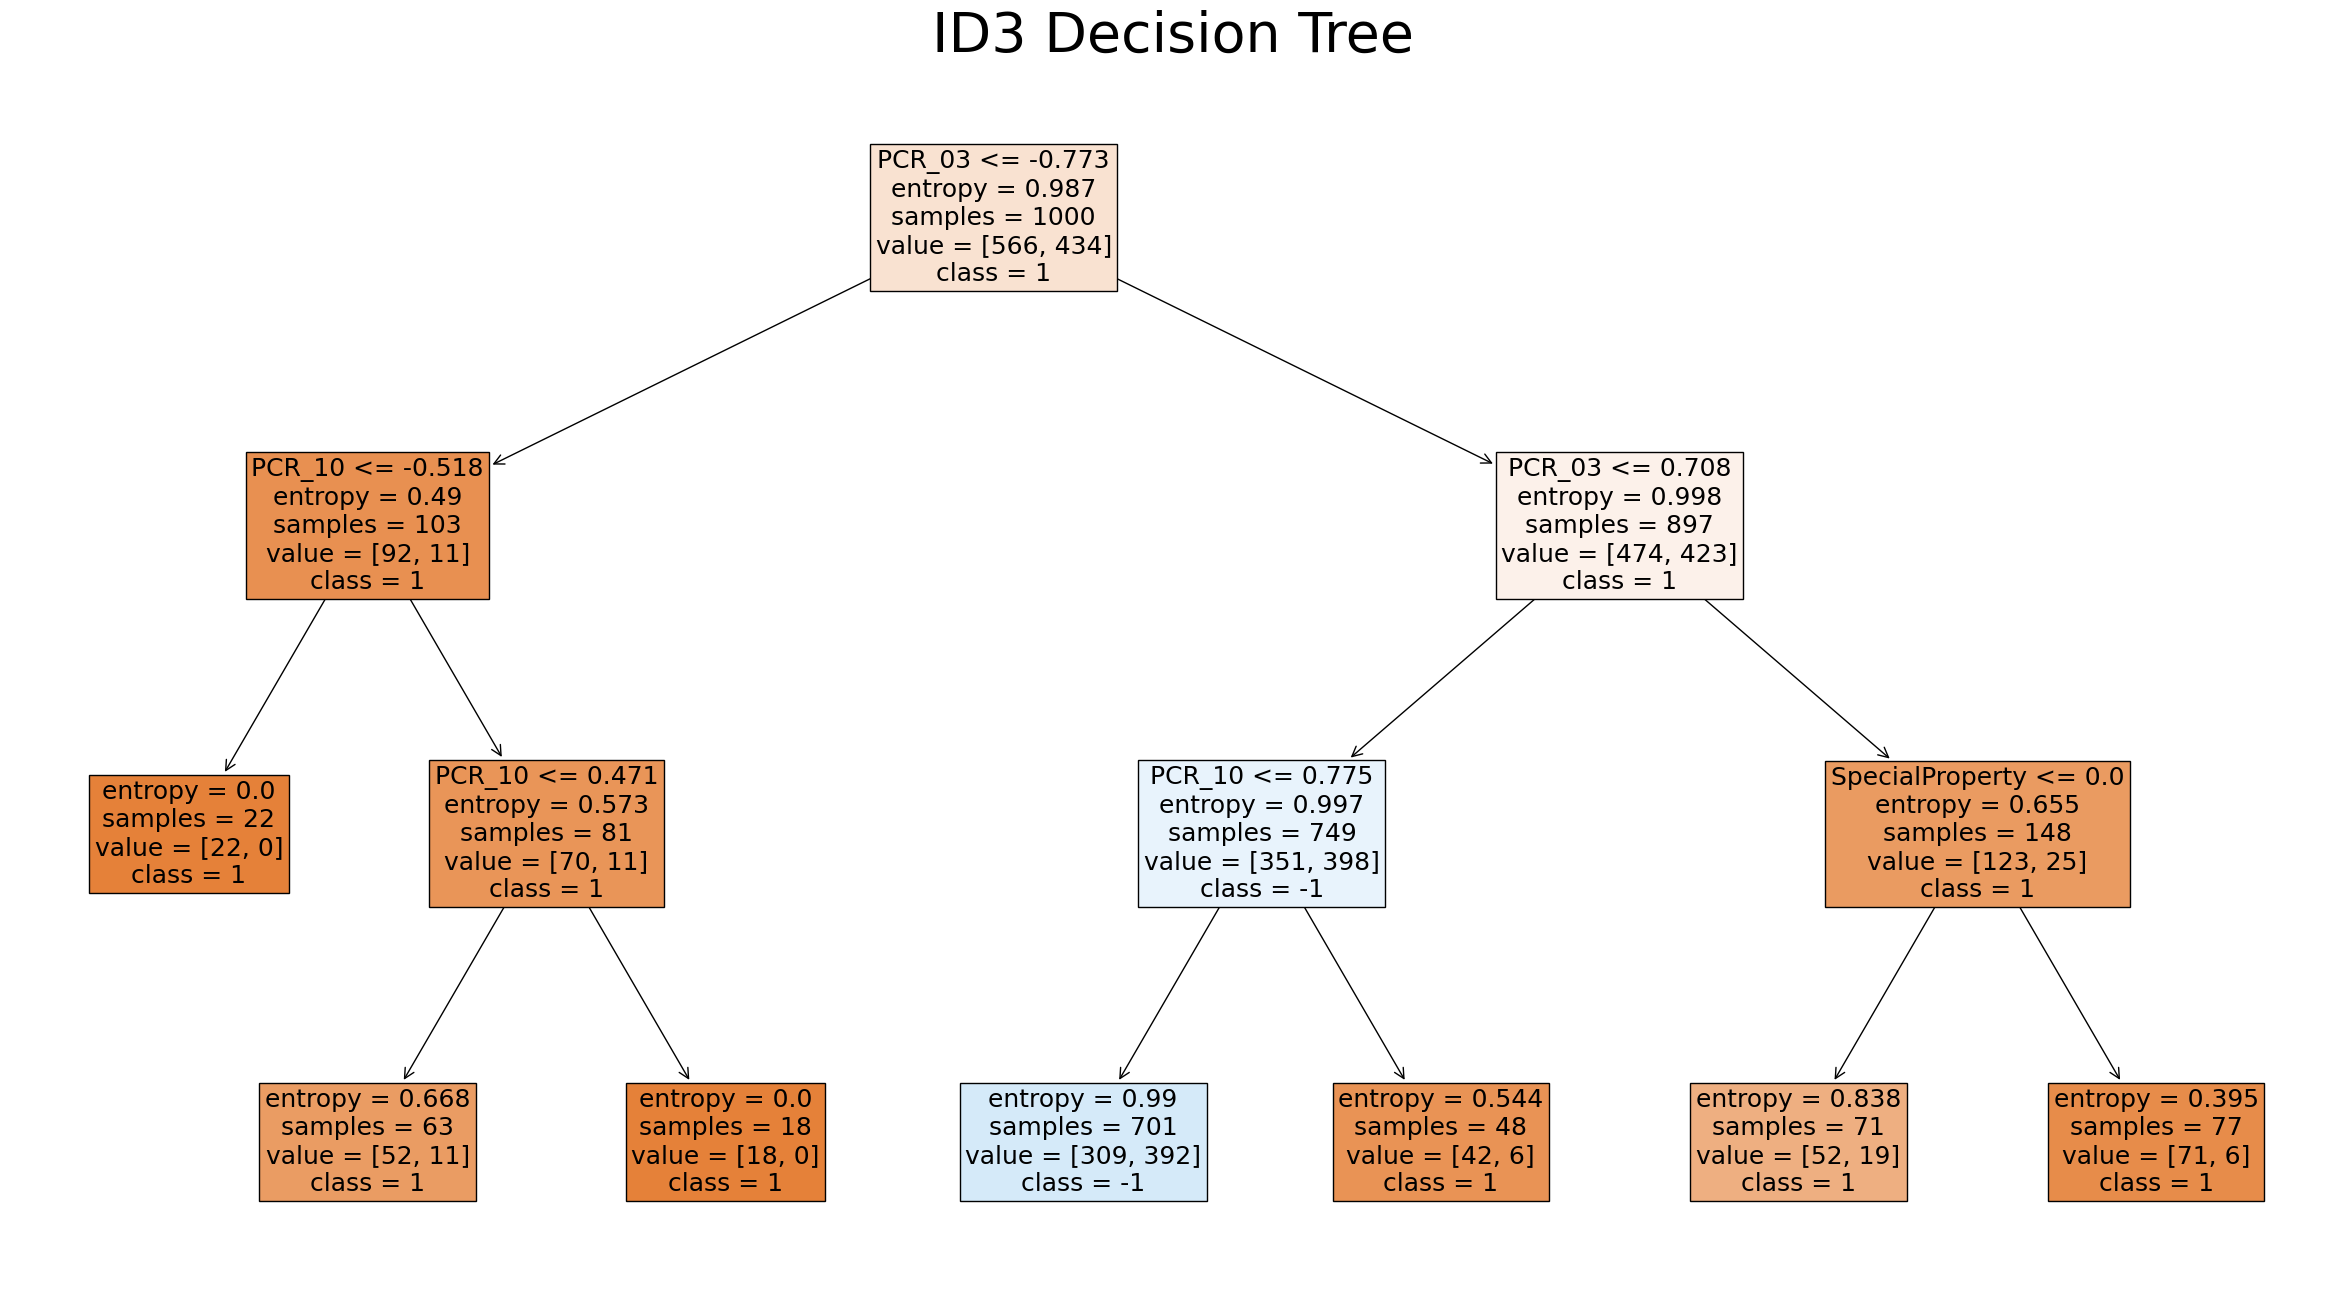

The trainig accuracy is 0.649


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

treeclf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
treeclf.fit(X2,Y2)

fnames= tmp2.columns

plt.figure(figsize=(30,16))
tree.plot_tree(treeclf, feature_names=fnames,  class_names=['1', '-1'], filled=True, fontsize=18)
plt.title('ID3 Decision Tree', fontsize=40)
plt.show()

print(f'The trainig accuracy is {treeclf.score(X2, Y2)}')

## **Model selection**

Q6

In [21]:
from sklearn.model_selection import GridSearchCV

params1 = {'min_samples_leaf':[10,20,40,80,100,200,300,400,500],'max_depth':[3,4,5,6,7,8,9,10]}
params2 = {'min_samples_leaf':[5,10,15,20,40,50,75,100],'max_depth':[3,4,5,6,7,8,9,10,11,12]}
params3 = {'min_samples_leaf':[3,5,8,10,15,20,40,50],'max_depth':[3,4,5,6,7,8]}
params4=  {'min_samples_leaf':[2,3,4,5,6,8,10,12,15,20],'max_depth':[3,4,5,6,7,8,9,10]}
params5 = {'min_samples_leaf':[3,5,6,7,8,9,10,12,15,16,17,18,19,20,25],'max_depth':[3,4,5,6,7,8]}
params6 = {'min_samples_leaf':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],'max_depth':[3,4,5,6,7,8,9,10]}
curr_params = params6
selectionclf = GridSearchCV(DecisionTreeClassifier(), curr_params,cv=5, return_train_score=True)
selectionclf.fit(X2, Y2)
df = pd.DataFrame.from_dict(selectionclf.cv_results_)
best_params = selectionclf.best_params_
best_score = selectionclf.best_score_
print(f'The best parameters are {best_params}')
print(f'The best score is {best_score}')

The best parameters are {'max_depth': 10, 'min_samples_leaf': 8}
The best score is 0.8130000000000001


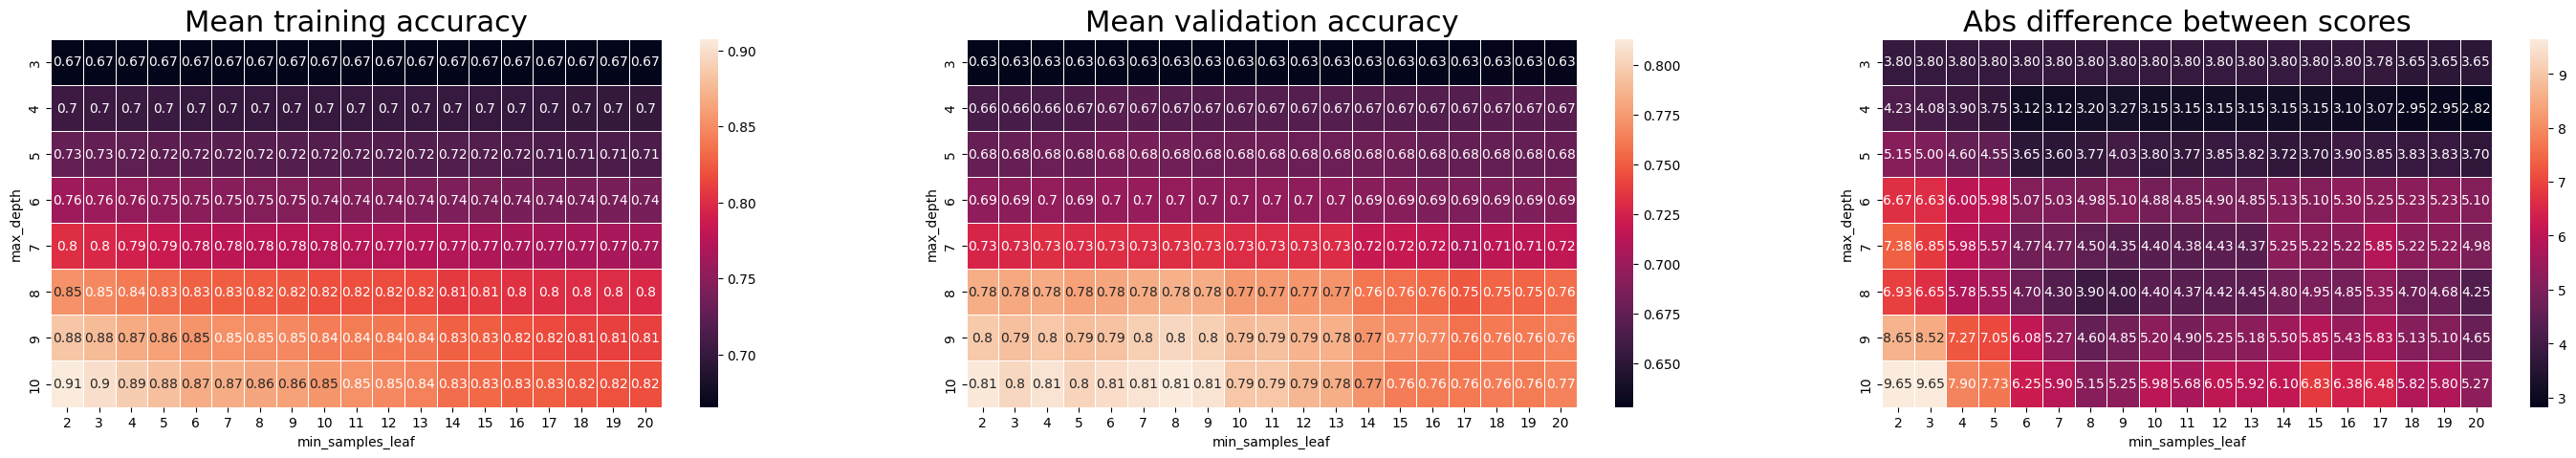

In [22]:
train_pivot = pd.pivot_table(df, values='mean_train_score',index='param_max_depth', columns='param_min_samples_leaf')
test_pivot = pd.pivot_table(df, values='mean_test_score',index='param_max_depth', columns='param_min_samples_leaf')

df['score_diff'] = (abs(df['mean_test_score'] - df['mean_train_score']))*100
diff_pivot = pd.pivot_table(df, values='score_diff',index='param_max_depth', columns='param_min_samples_leaf')
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(35, 5))
sns.heatmap(train_pivot, annot=True, linewidth=.5, ax=ax1)
ax1.set_title("Mean training accuracy", fontsize=22)
ax1.set_xlabel("min_samples_leaf")
ax1.set_ylabel("max_depth")
sns.heatmap(test_pivot, annot=True,linewidth=.5, ax=ax2)
ax2.set_title("Mean validation accuracy", fontsize=22)
ax2.set_xlabel("min_samples_leaf")
ax2.set_ylabel("max_depth")
sns.heatmap(diff_pivot, annot=True,fmt=".2f",linewidth=.5, ax=ax3)
ax3.set_title("Abs difference between scores", fontsize=22)
ax3.set_xlabel("min_samples_leaf")
_ = ax3.set_ylabel("max_depth")


Q8

In [23]:
optclf = DecisionTreeClassifier(criterion="entropy", max_depth=10, min_samples_leaf=9) #changed to 10
optclf.fit(X2, Y2)
print(f"The training accuracy is: {optclf.score(X2, Y2)}")

test_data2 = test.copy(deep=True)
test_data2.drop(columns='current_location', inplace=True)
test_data2['SpecialProperty'] = test_data2['SpecialProperty'].replace({True: 1, False: -1})

tmp2_test = test_data2[['PCR_03', 'PCR_10', 'SpecialProperty', 'risk']]
Y2_test = tmp2_test['risk'].values
tmp2_test.drop('risk', inplace=True, axis=1)
X2_test = tmp2_test.values
print(f"The test accuracy is: {optclf.score(X2_test, Y2_test)}")


The training accuracy is: 0.868
The test accuracy is: 0.844


<ipython-input-23-84455d9aed19>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp2_test.drop('risk', inplace=True, axis=1)


# **Part 3: Linear SVM and the Polynomial kernel**

### **Implementation of the loss and its gradient**

In [24]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

class SoftSVM(BaseEstimator, ClassifierMixin):
    """
    Custom C-Support Vector Classification.
    """
    def __init__(self, C: float, lr: float = 1e-5, batch_size = 32):
        """
        Initialize an instance of this class.
        ** Do not edit this method **

        :param C: inverse strength of regularization. Must be strictly positive.
        :param lr: the SGD learning rate (step size)
        """
        self.C = C
        self.lr = lr
        self.batch_size = batch_size
        self.w = None
        self.b = 0.0

    # Initialize a random weight vector
    def init_solution(self, n_features: int):
        """
        Randomize an initial solution (weight vector)
        ** Do not edit this method **

        :param n_features:
        """
        self.w = np.random.randn(n_features)
        self.b = 0.0

    @staticmethod
    def loss(w, b: float, C: float, X, y):
        """
        Compute the SVM objective loss.

        :param w: weight vector for linear classification; array of shape (n_features,)
        :param b: bias scalar for linear classification
        :param C: inverse strength of regularization. Must be strictly positive.
        :param X: samples for loss computation; array of shape (n_samples, n_features)
        :param y: targets for loss computation; array of shape (n_samples,)
        :return: the Soft SVM objective loss (float scalar)
        """
        margins = (X.dot(w) + b).reshape(-1, 1)
        hinge_inputs = np.multiply(margins, y.reshape(-1, 1))

        norm = np.linalg.norm(w)

        # TODO: complete the loss calculation
        complementary_vec = 1 - hinge_inputs
        zero_vec = np.zeros(hinge_inputs.shape)
        max_vec = np.maximum(zero_vec, complementary_vec)
        hinge_sum = np.sum(max_vec)
        loss = (norm ** 2) + C * hinge_sum
        return loss

    @staticmethod
    def subgradient(w, b: float, C: float, X, y):
        """
        Compute the (analytical) SVM objective sub-gradient.

        :param w: weight vector for linear classification; array of shape (n_features,)
        :param b: bias scalar for linear classification
        :param C: inverse strength of regularization. Must be strictly positive.
        :param X: samples for loss computation; array of shape (n_samples, n_features)
        :param y: targets for loss computation; array of shape (n_samples,)
        :return: a tuple with (the gradient of the weights, the gradient of the bias)
        """
        # TODO: calculate the analytical sub-gradient of soft-SVM w.r.t w and b
        margins = (X.dot(w) + b).reshape(-1, 1)
        hinge_inputs = np.multiply(margins, y.reshape(-1, 1))
        condition = hinge_inputs < 1
        f_hinge_inputs = np.where(condition, -1, 0)
        f_mul_y = np.multiply(f_hinge_inputs, y.reshape(-1, 1))
        f_mul_y_dot_x = ((f_mul_y.T).dot(X)).reshape(-1, 1)

        g_w = 2*w + C * np.sum(f_mul_y_dot_x)
        g_b = C * np.sum(f_mul_y)
        return g_w, g_b

    def fit_with_logs(self, X, y, max_iter: int = 2000, keep_losses: bool = True):
        """
        Fit the model according to the given training data.

        :param X: training samples; array of shape (n_samples, n_features)
        :param y: training targets (+1 and -1); array of shape (n_samples,)
        :param max_iter: number of SGD iterations
        :param keep_losses:
        :return: the training losses and accuracies during training
        """
        # Initialize learned parameters
        self.init_solution(X.shape[1])

        losses = []
        accuracies = []

        if keep_losses:
            losses.append(self.loss(self.w, self.b, self.C, X, y))
            accuracies.append(self.score(X, y))

        permutation = np.random.permutation(len(y))
        X = X[permutation, :]
        y = y[permutation]

        # Iterate over batches
        for iter in range(0, max_iter):
            start_idx = (iter * self.batch_size) % X.shape[0]
            end_idx = min(X.shape[0], start_idx + self.batch_size)
            batch_X = X[start_idx:end_idx, :]
            batch_y = y[start_idx:end_idx]

            # TODO: Compute the (sub)gradient of the current *batch*
            g_w, g_b = self.subgradient(self.w, self.b, self.C, batch_X, batch_y)

            # Perform a (sub)gradient step
            # TODO: update the learned parameters correctly
            self.w = self.w - self.lr*g_w
            self.b = self.b - self.lr*g_b

            if keep_losses:
                losses.append(self.loss(self.w, self.b, self.C, X, y))
                accuracies.append(self.score(X, y))

        return losses, accuracies

    def fit(self, X, y, max_iter: int = 2000):
        """
        Fit the model according to the given training data.
        ** Do not edit this method **

        :param X: training samples; array of shape (n_samples, n_features)
        :param y: training targets (+1 and -1); array of shape (n_samples,)
        :param max_iter: number of SGD iterations
        """
        self.fit_with_logs(X, y, max_iter=max_iter, keep_losses=False)

        return self

    def predict(self, X):
        """
        Perform classification on samples in X.

        :param X: samples for prediction; array of shape (n_samples, n_features)
        :return: Predicted class labels for samples in X; array of shape (n_samples,)
                 NOTE: the labels must be either +1 or -1
        """
        # TODO: compute the predicted labels (+1 or -1)
        y_pred = np.sign((X.dot(self.w) + self.b))
        y_pred[y_pred == 0] = 1

        return y_pred


### **Verifying your implementation: Numerical vs. analytical gradients**

In [25]:
def numerical_subgradient(w, b, C, X, y, delta=1e-4):
    w_ = w.copy()
    g_w = np.zeros_like(w_)
    orig_objective = SoftSVM.loss(w_, b, C, X, y)
    for i in range(g_w.shape[0]):
        w_[i] += delta
        perturbed_objective = SoftSVM.loss(w_, b, C, X, y)
        w_[i] -= delta
        g_w[i] = (perturbed_objective - orig_objective) / delta

    g_b = (SoftSVM.loss(w_, b + delta, C, X, y) - orig_objective) / delta
    return g_w, g_b



def compare_gradients(X, y, deltas, C=1, REPEATS=100, figsize=(10, 6)):
    residual_means = []

    for delta in deltas:
        residuals = []

        for _ in range(REPEATS):
            # Randomize vectors in which the gradient is computed
            w = np.random.randn(X.shape[1])
            b = np.random.randn(1)

            # Compute the two types of gradients
            analytic_grad = SoftSVM.subgradient(w, b, C, X, y)[0]
            numeric_grad = numerical_subgradient(w, b, C, X, y, delta=delta)[0]

            residual = np.linalg.norm(numeric_grad - analytic_grad)
            residuals.append(residual)

        residual_means.append(np.mean(residuals))

    plt.figure(figsize=figsize)
    plt.title('Residuals of analytical and numerical gradients', fontsize=22)
    plt.plot(deltas, residual_means, linewidth=3)
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('$\delta$', fontsize=18)
    plt.ylabel(r'$\left\Vert \nabla_{w}p_{C}\left(w,b\right) - u_{\delta} \left(w,b\right)\right\Vert$', fontsize=18)

    plt.grid(alpha=0.5)
    plt.show()


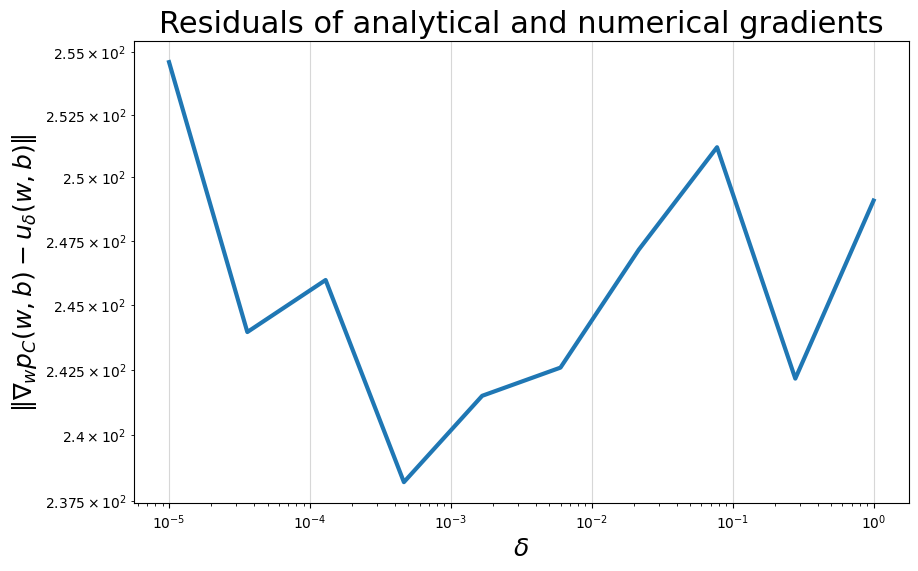

In [26]:
tmp3 = train.copy(deep=True)
X_train = tmp3[['PCR_04', 'PCR_09']].values
y_train = tmp3['spread'].values

compare_gradients(X_train, y_train, deltas=np.logspace(-5, 0, 10))



In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

C=1e5
lr_list = np.logspace(-11, -3, 5)

for lr in lr_list:
  clf = SoftSVM(C=C, lr=lr)
  X_train_poly = PolynomialFeatures(degree=3,).fit_transform(X_train)
  X_train_poly = MinMaxScaler(feature_range=(-1,1)).fit_transform(X_train_poly)
  losses, accuracies = clf.fit_with_logs(X_train_poly, y_train, max_iter=5000)
  plt.figure(figsize=(13, 6))
  plt.subplot(121), plt.grid(alpha=0.5), plt.title ("Training Loss")
  plt.semilogy(losses), plt.xlabel("Step"), plt.ylabel("Loss")
  plt.subplot(122), plt.grid(alpha=0.5), plt.title ("Training Accuracy")
  plt.plot(accuracies), plt.xlabel("Step"), plt.ylabel("Accuracy")
  plt.tight_layout()
  plt.show()

[1.e-11 1.e-09 1.e-07 1.e-05 1.e-03]


In [36]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
svm_clf = Pipeline([('feature_mapping', TODO),
 ('scaler', MinMaxScaler()),
  ('SVM', SoftSVM(C=1e5, lr=TODO))])
svm_clf.fit(X_train, y_train)

NameError: name 'TODO' is not defined